In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

<font size="+3" color='#540b11'><b>1. Data cleaning </b></font>

In [2]:
#reading dataset
data=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#printing top 10 rows of dataset
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Drop car Id 

In [4]:
#droping car_id from dataset
data=data.drop(['car_ID'],axis=1)

## Extracting car company from car name

In [5]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)

## Handling duplicate values in car name 

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [6]:
#replacing the duplicate values in car name
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
data['symboling']=data['symboling'].astype('str')

# Categorical columns

In [8]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [9]:
#printing the categorical data
data[categorical_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


## Numerical columns 

In [10]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [11]:
#printing the numerical data
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


<font size="+3" color='#540b11'><b>2. Exploratory Data Analysis </b></font>

In [12]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
# checking for missing data
df=pd.DataFrame({'Type': data.dtypes,
                  'Missing': data.isna().sum(),
                  'Size':data.shape[0],
                  'Unique': data.nunique()})
df['Missing_%']= (df.Missing/df.Size)*100
df[df['Missing']>0].sort_values(by=['Missing_%'], ascending=False)

,Type,Missing,Size,Unique,Missing_%


 No missing data in this dataset.

In [14]:
#checking number of null values present
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

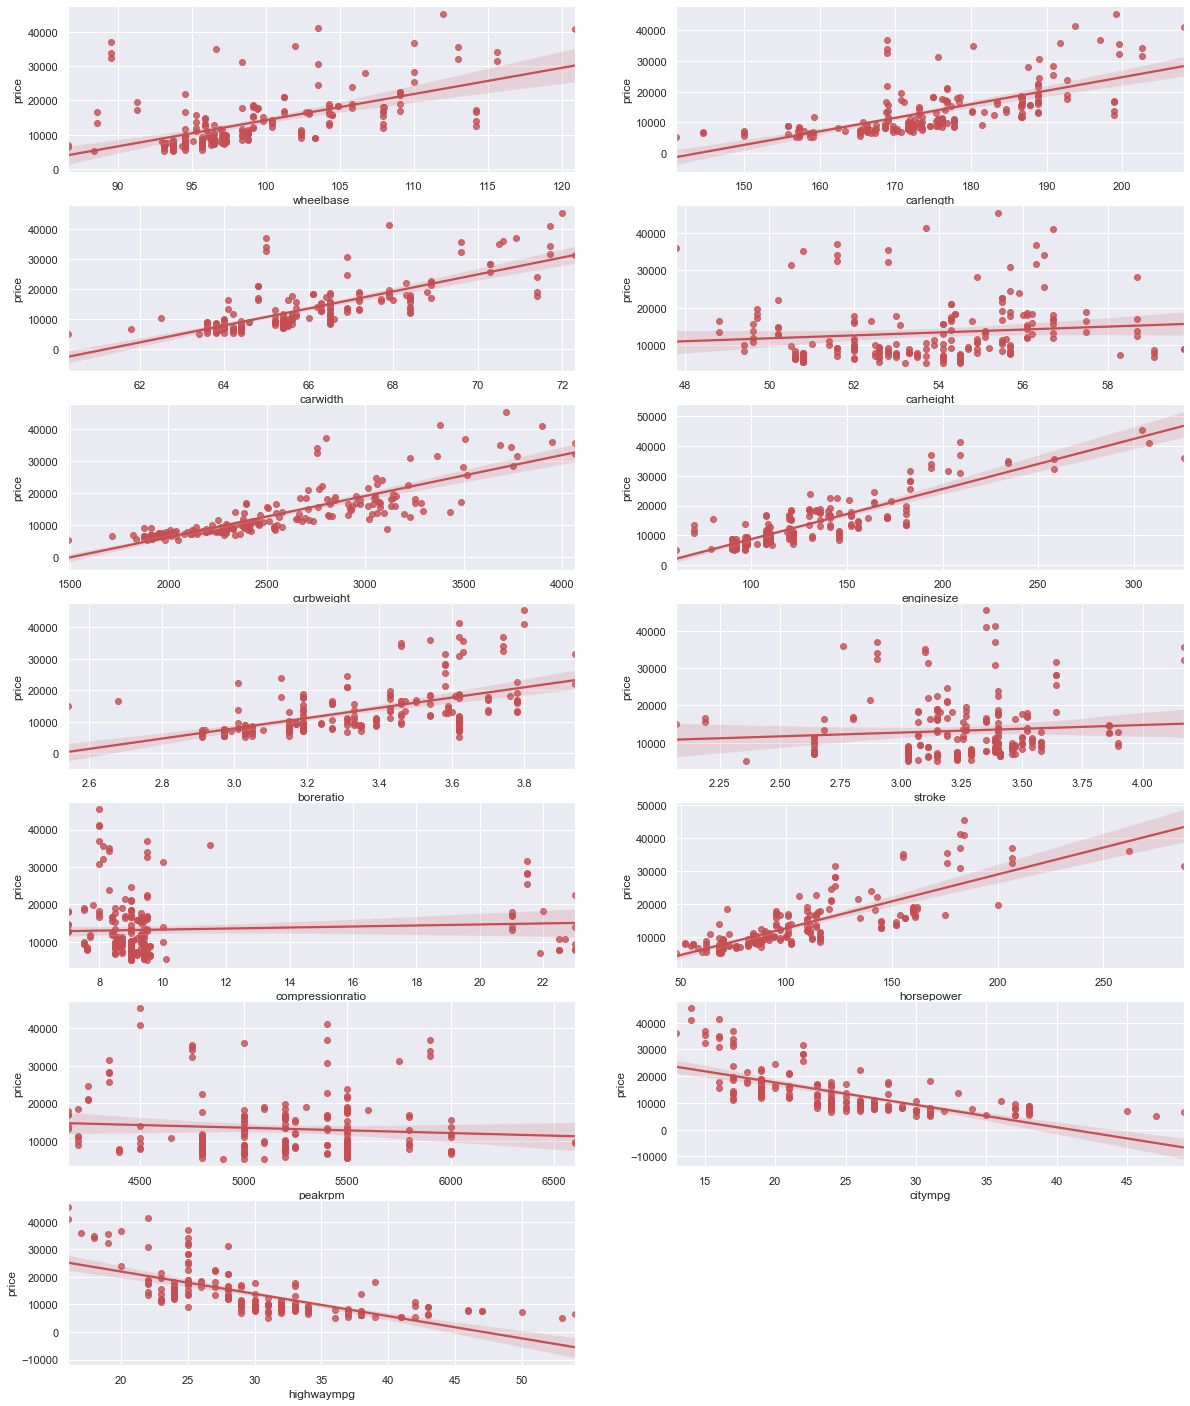

In [15]:
# univariate analysis
# ploting the graph of price vs other columns in dataset

sns.set_theme()
features=[i for i in (data.iloc[:,1:-1]).columns if data[i].dtypes!='object' ]

i = 1
plt.figure(figsize=(20,25))
for j in features:
    plt.subplot(7, 2, i)
    sns.regplot(x=j,data=data, y='price', color='r')
    plt.xlabel(j)
    i += 1
plt.show()

Visualise different car names

In [16]:
#counting the number of cars present in our dataset by car name
df=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})

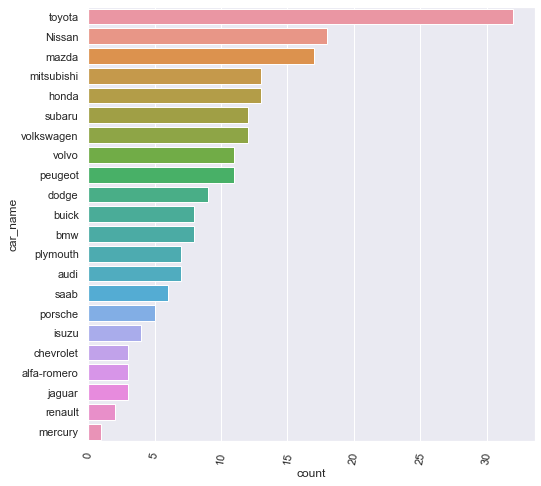

In [17]:
#ploting the graph of different car names
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

According to the dataset-

Toyota is the most suitable car
mercury is the least suitable car

<AxesSubplot:xlabel='fueltype', ylabel='count'>

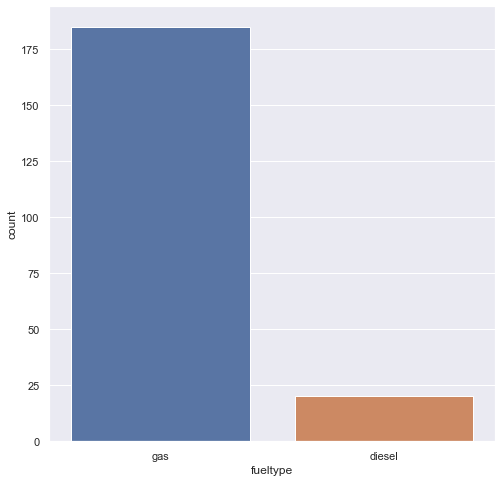

In [18]:
#comparing the fueltype of gas and diesel engine
sns.countplot(x='fueltype', data=data)

Few cars run on diesel as compared to gasoline.

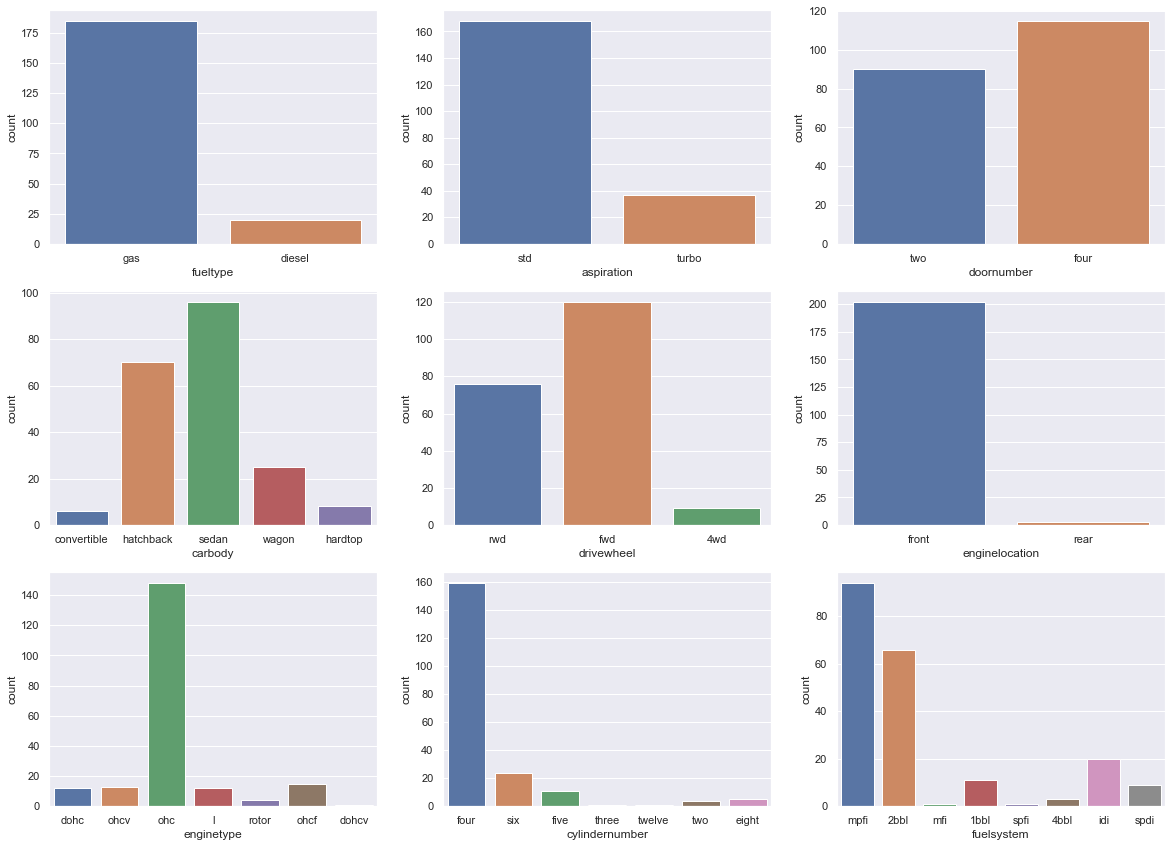

In [19]:
# comparision made on the different features in particular column by barplot

sns.set_theme()
features=[i for i in (data.iloc[:,1:-1]).columns if data[i].dtypes=='object' ]
features.remove('CarName')

i = 1
plt.figure(figsize=(20,25))
for j in features:
    plt.subplot(5, 3, i)
    sns.countplot(x=j,data=data,palette='deep')
    plt.xlabel(j)
    i += 1
plt.show()

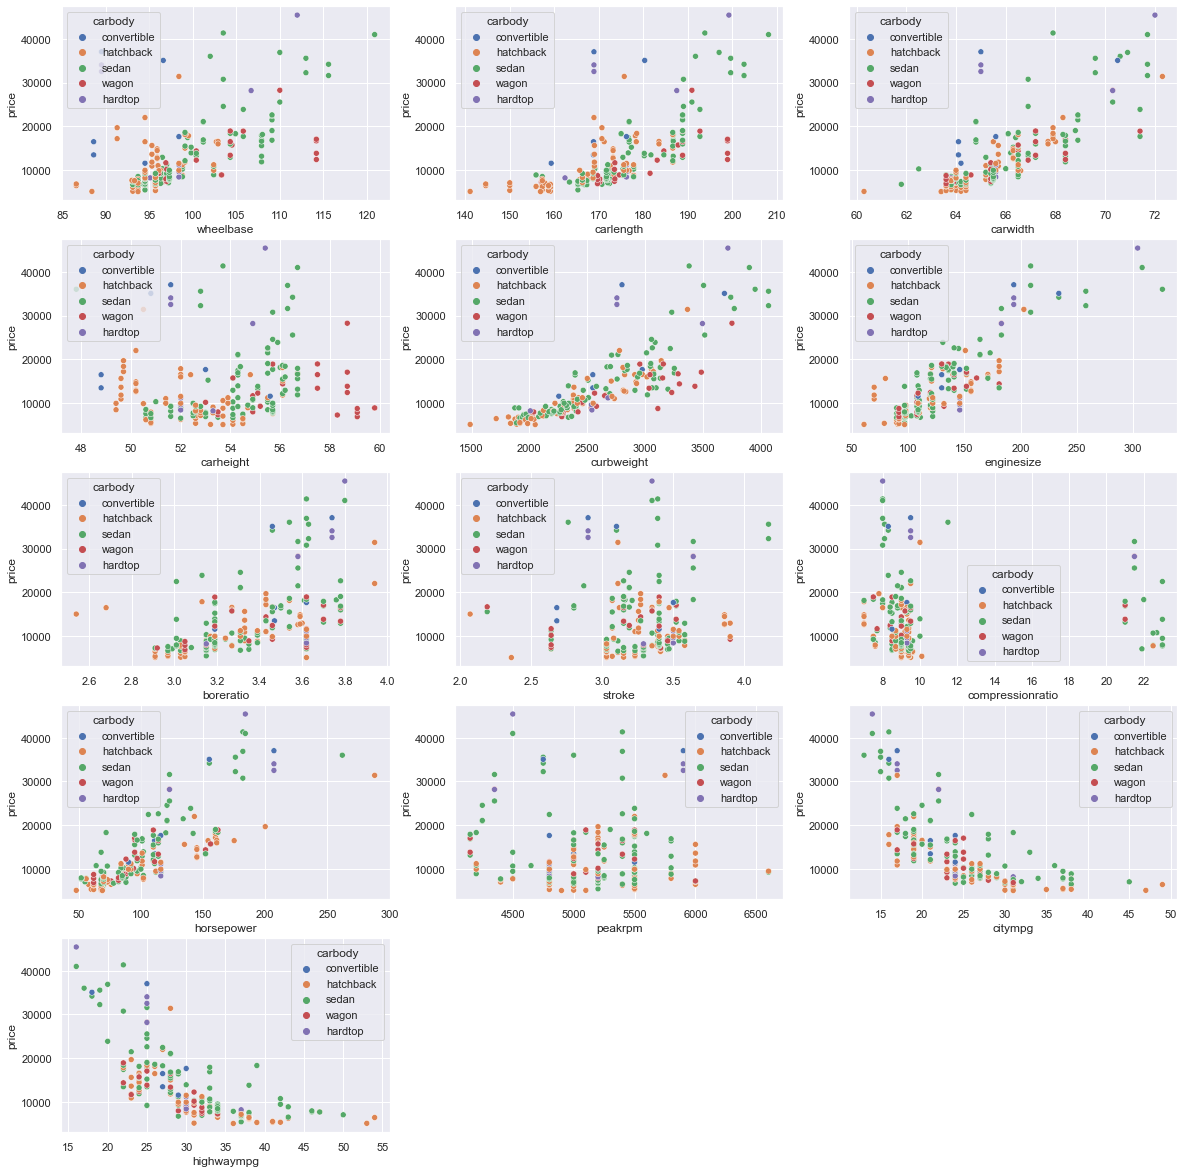

In [20]:
#Multivariate Analysis
#Let's understand the numerical characteristics of cars and plot these characteristics against the price of the car.

sns.set_theme()
features=[i for i in (data.iloc[:,1:-1]).columns if data[i].dtypes!='object' ]

plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(20,25))
for j in features:
    plt.subplot(6, 3, i)
    sns.scatterplot(x=j,data=data, y='price',hue='carbody',palette='deep')
    plt.xlabel(j)
    i += 1
plt.show()

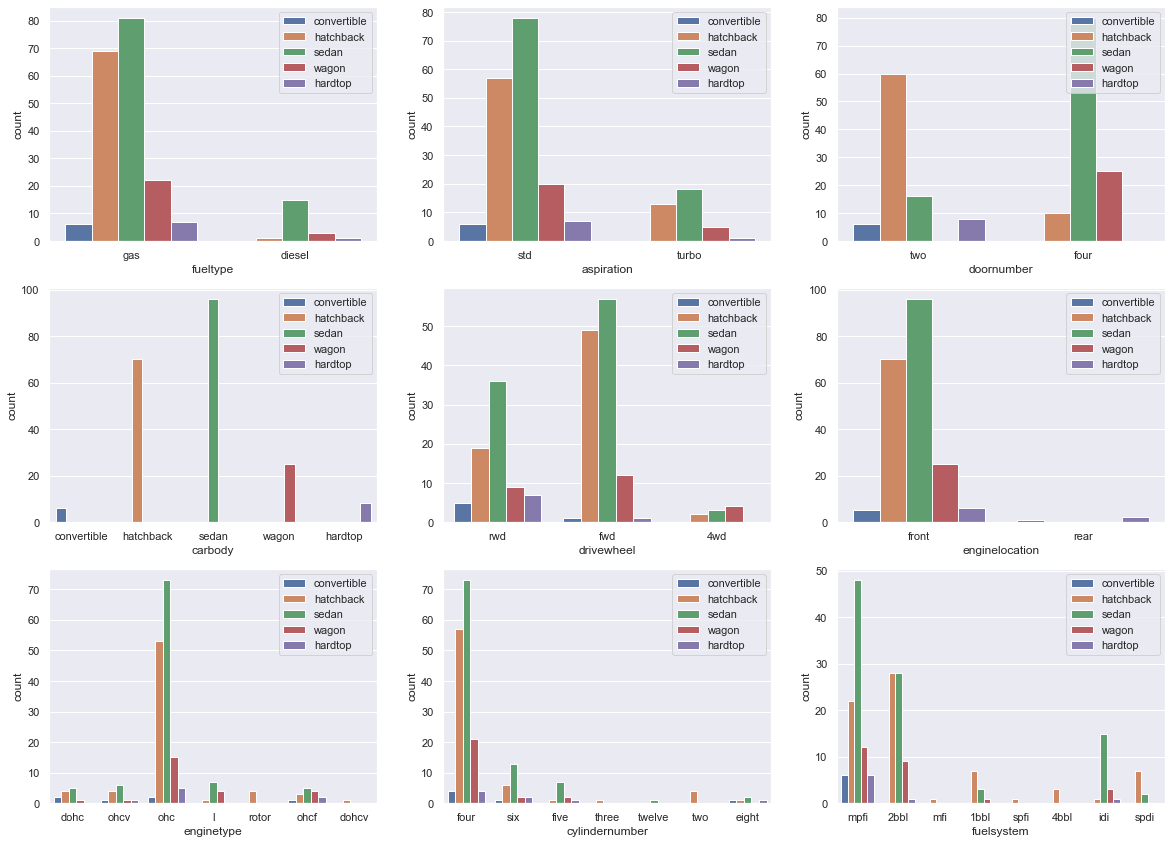

In [21]:
# counting the number of cars based on the different characteristics of cars and ploting the bar graph

sns.set_theme()
features=[i for i in (data.iloc[:,1:-1]).columns if data[i].dtypes=='object' ]
features.remove('CarName')

i = 1
plt.figure(figsize=(20,25))
for j in features:
    plt.subplot(5, 3, i)
    sns.countplot(x=j,data=data, hue='carbody',palette='deep')
    plt.legend(loc='upper right')
    plt.xlabel(j)
    i += 1
plt.show()

DATA PREPOCESSING

In [22]:
# checking the unique values present in the particular column of our dataset 
# printing the unique values and count

for i in data.columns:
    if data[i].dtypes=='object':
        print('Unique values in the column {} are {}'.format(i, data[i].unique()))
        
print('-'*120)
print('-'*120)
print('-'*120)
for i in data.columns:
    if data[i].dtypes=='object':
        print('Number of unique values in the column {} are {}'.format(i, data[i].nunique()))    

Unique values in the column symboling are ['3' '1' '2' '0' '-1' '-2']
Unique values in the column CarName are ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
Unique values in the column fueltype are ['gas' 'diesel']
Unique values in the column aspiration are ['std' 'turbo']
Unique values in the column doornumber are ['two' 'four']
Unique values in the column carbody are ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in the column drivewheel are ['rwd' 'fwd' '4wd']
Unique values in the column enginelocation are ['front' 'rear']
Unique values in the column enginetype are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in the column cylindernumber are ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in the column fuelsystem are ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 

<AxesSubplot:xlabel='citympg', ylabel='price'>

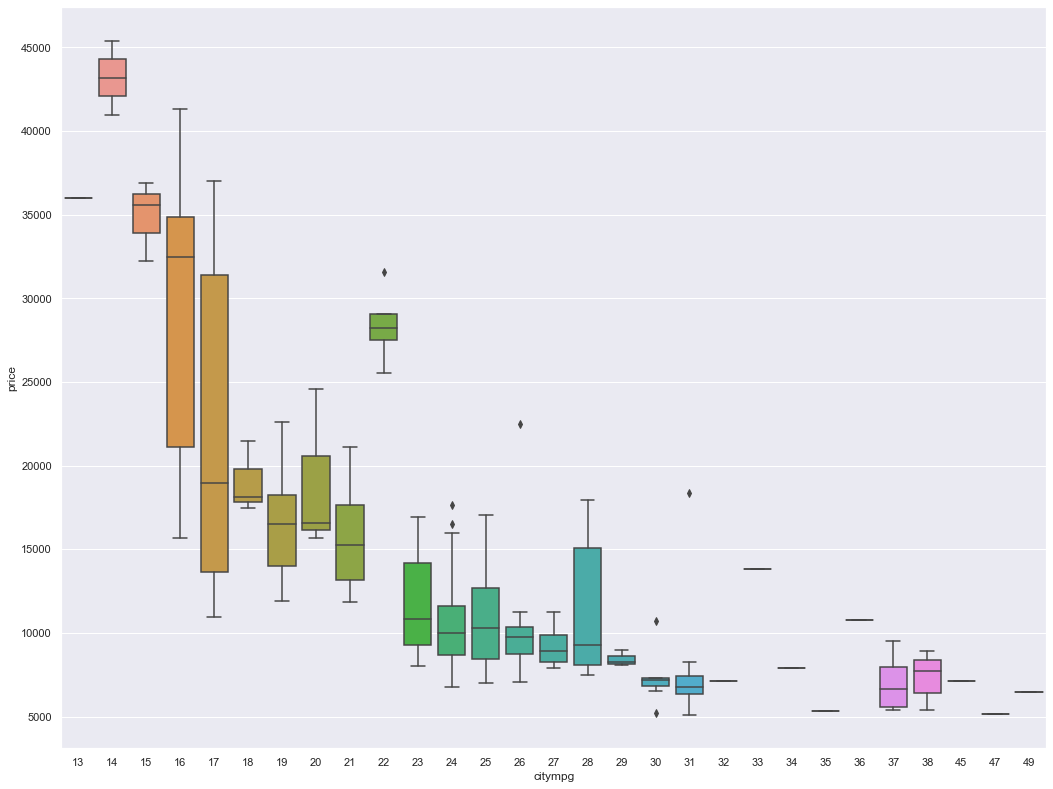

In [23]:
#Removal of outliers 

plt.figure(figsize=(60, 30))
plt.subplot(2,3,1)
sns.boxplot(x = 'citympg', y = 'price', data = data)

In [24]:
percentile25 = data['citympg'].quantile(0.25)
percentile75 = data['citympg'].quantile(0.75)

In [25]:
#calculating inter quantile range
iqr=percentile75-percentile25

In [26]:
#calculating the upper_limit and lower_limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [27]:
#printing the upper_limit and lower_limit
print(upper_limit)
print(lower_limit)

46.5
2.5


In [28]:
data[data['citympg'] > upper_limit]
data[data['citympg'] < lower_limit]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [29]:
new_df = data[data['citympg'] < upper_limit]
new_df.shape

(203, 25)

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hist

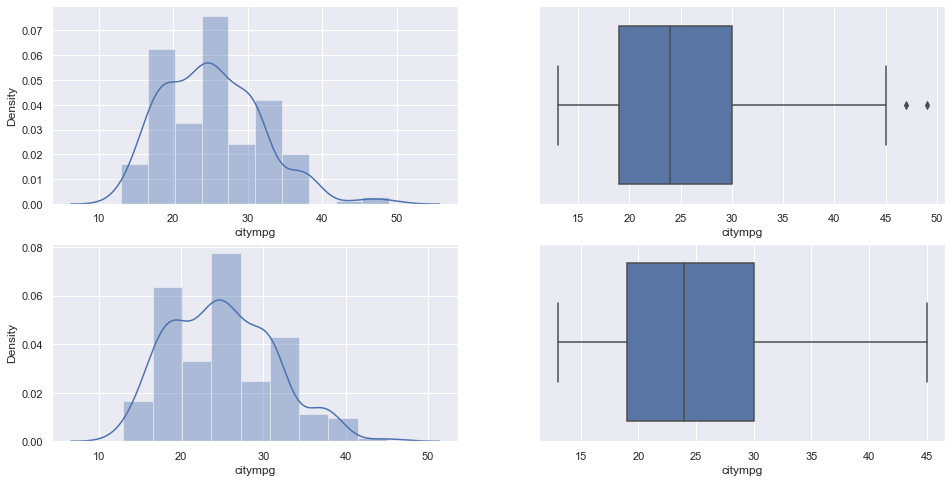

In [30]:
#ploting the boxplot of before removal of outlier and after removal of outlier

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['citympg'])
plt.subplot(2,2,2)
sns.boxplot(data['citympg'])
plt.subplot(2,2,3)
sns.distplot(new_df['citympg'])
plt.subplot(2,2,4)
sns.boxplot(new_df['citympg'])
plt.show()

removal of outlier from 'highwaympg'

In [31]:
percentile25 = data['highwaympg'].quantile(0.25)
percentile75 = data['highwaympg'].quantile(0.75)

In [32]:
#calculating inter quantile range
iqr=percentile75-percentile25

In [33]:
##calculating the upper_limit and lower_limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [34]:
#printing the upper_limit and lower_limit
print(upper_limit)
print(lower_limit)

47.5
11.5


In [35]:
data[data['highwaympg'] > upper_limit]
data[data['highwaympg'] < lower_limit]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [36]:
new_df = data[data['highwaympg'] < upper_limit]
new_df.shape

(202, 25)

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hist

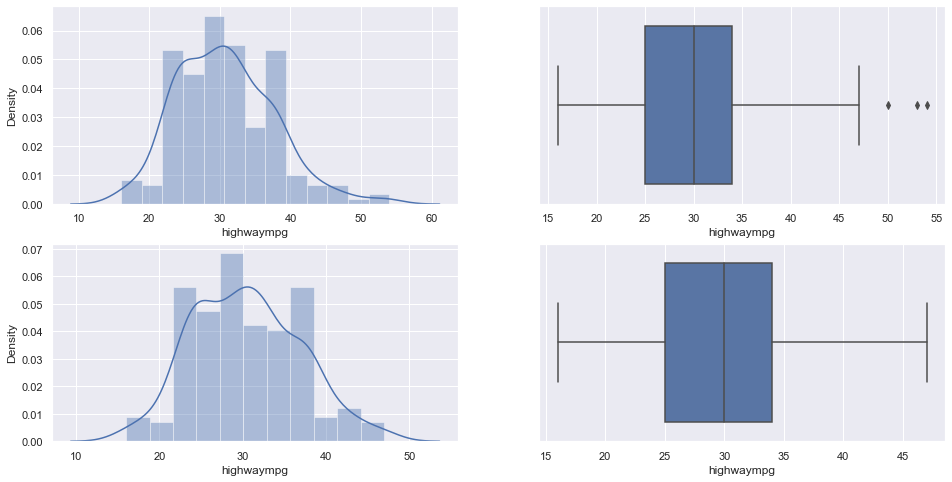

In [37]:
#ploting the boxplot of before removal of outlier and after removal of outlier

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['highwaympg'])
plt.subplot(2,2,2)
sns.boxplot(data['highwaympg'])
plt.subplot(2,2,3)
sns.distplot(new_df['highwaympg'])
plt.subplot(2,2,4)
sns.boxplot(new_df['highwaympg'])
plt.show()

Price distribution of cars

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

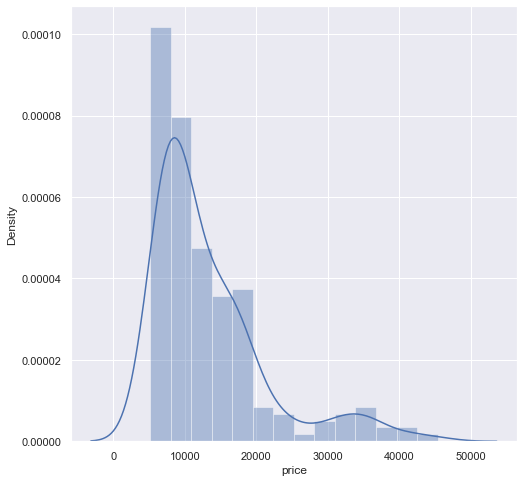

In [38]:
#ploting the graph of price distribution of cars
sns.distplot(data['price'],kde=True)

* Price distribution plot is right skewed 
* maximum  number of cars are in range of 20000

 Price distribution of diesel vs gas car

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of price of diesel vehicles')

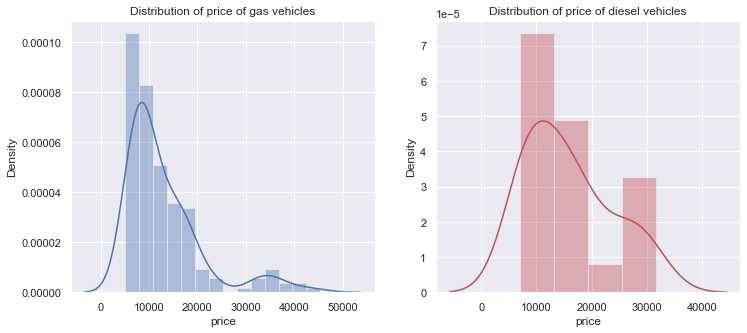

In [39]:
#ploting graph of Price distribution of diesel vs gas car
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of price of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

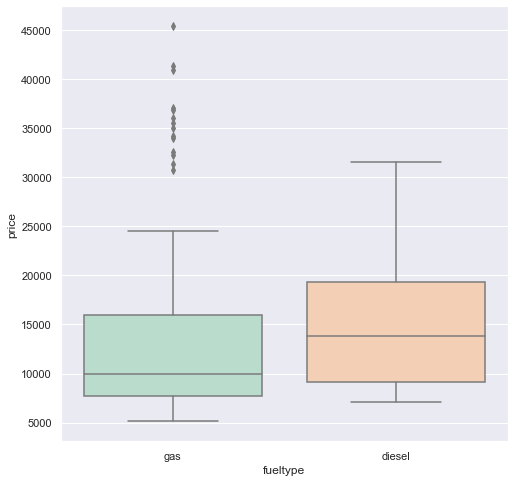

In [40]:
sns.boxplot(x = 'fueltype', y = 'price', data = data,palette='Pastel2')

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Aspiration ratio

In [41]:
df=pd.DataFrame(data['aspiration'].value_counts())

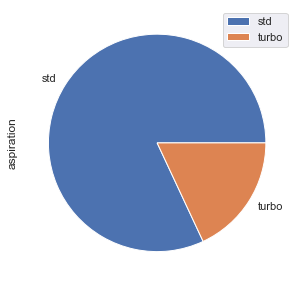

In [42]:
plot = df.plot.pie(y='aspiration', figsize=(5, 5))

* Most of the cars have standard aspiration

# Price distribution of Std vs Turbo aspiration vehicles

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

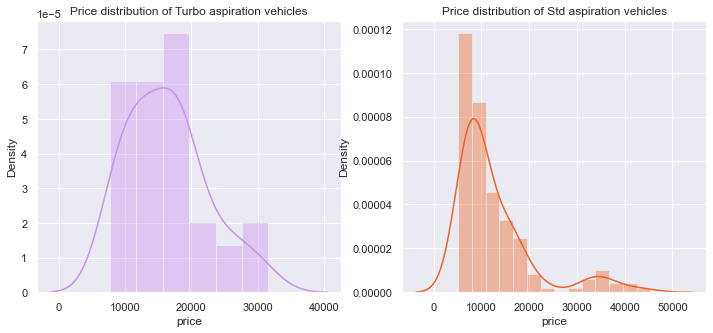

In [43]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


<AxesSubplot:xlabel='aspiration', ylabel='price'>

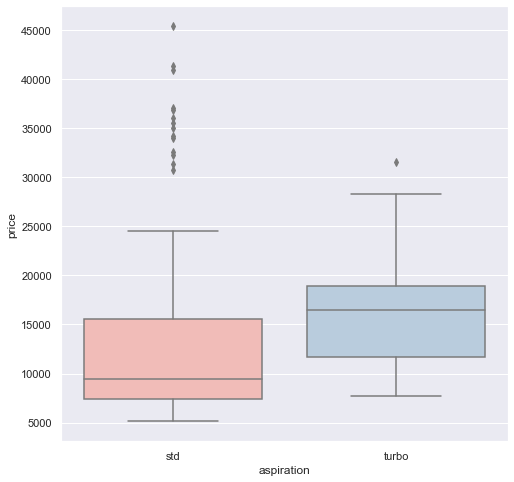

In [44]:
sns.boxplot(x = 'aspiration', y = 'price', data = data,palette='Pastel1')

* Price of turbo is higher in compared to std , although there are some outliers in std price

# Symboling 

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [45]:
df=pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

<AxesSubplot:xlabel='symboling', ylabel='count'>

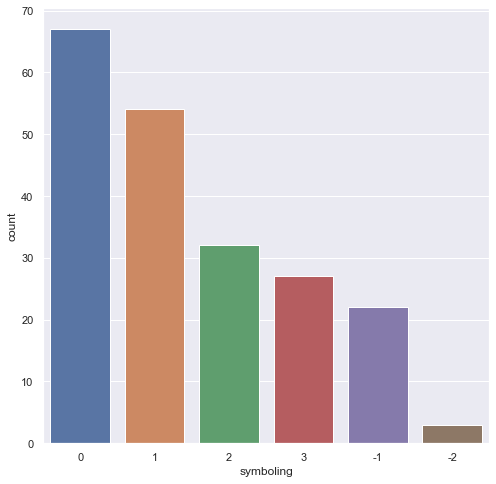

In [46]:
sns.barplot(x='symboling',y='count',data=df)

 * Most of the car symboling has 0 value 

# Price distribution according to symboling 

<AxesSubplot:xlabel='symboling', ylabel='price'>

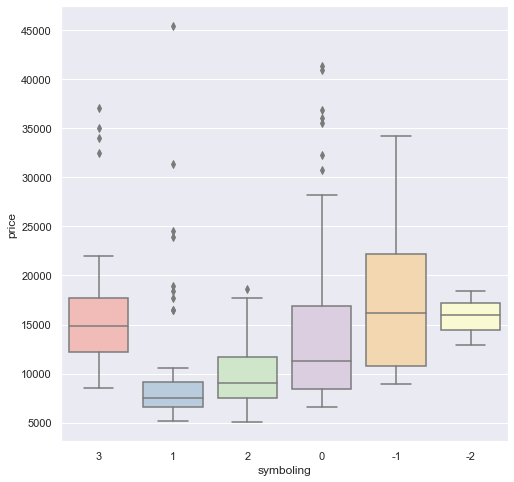

In [47]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='Pastel1')

* Price of -1 symboling is higher in compare to others

# Carbody

In [48]:
df=pd.DataFrame(data['carbody'].value_counts())

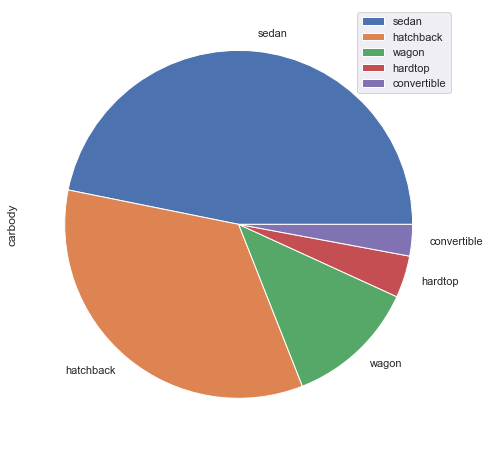

In [49]:
plot = df.plot.pie(y='carbody', figsize=(8, 8))

* majority of car body are sedan and hatchback

# Price distribution according to car body

<AxesSubplot:xlabel='carbody', ylabel='price'>

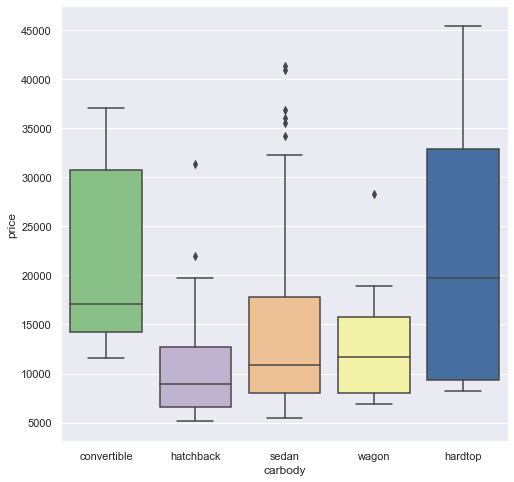

In [50]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

* price of hardtop is very high compare to others

# Drive wheel

In [51]:
df=pd.DataFrame(data['drivewheel'].value_counts())

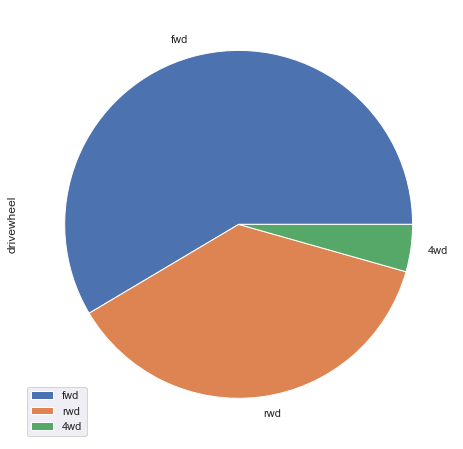

In [52]:
plot = df.plot.pie(y='drivewheel', figsize=(8, 8))

* Maximum cars has fwd drive wheel

# Price distribution according to drive wheel 

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

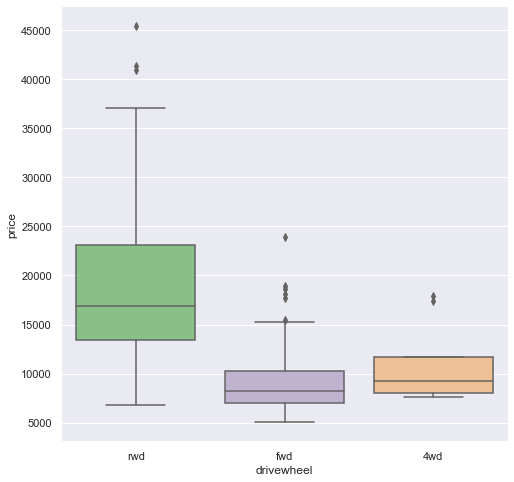

In [53]:
sns.boxplot(x = 'drivewheel', y = 'price', data = data,palette='Accent')

# Visualising Numerical features

# Wheel base Vs Price


<AxesSubplot:xlabel='wheelbase', ylabel='price'>

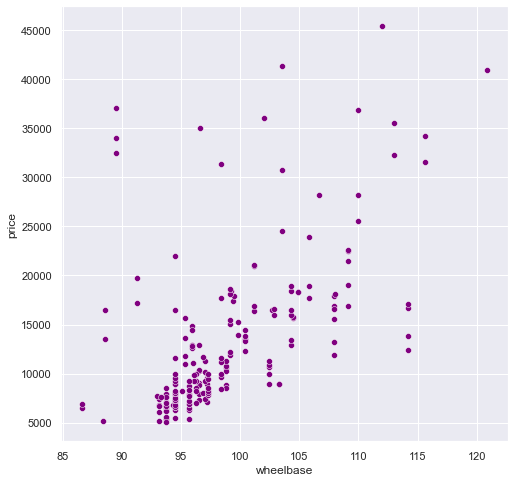

In [54]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

* Highly scattered points

# Carlength vs Car price

<AxesSubplot:xlabel='carlength', ylabel='price'>

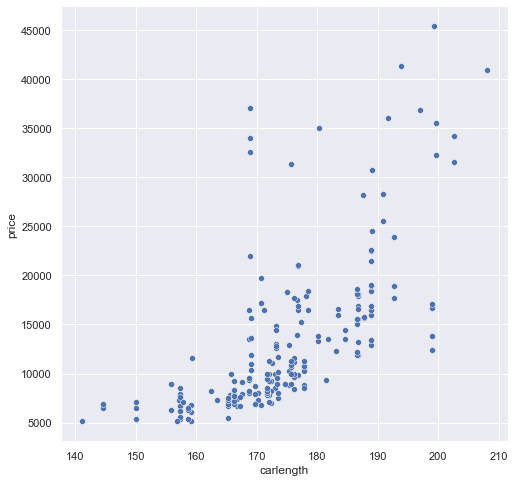

In [55]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

* car length also scattered but less scattered than wheelbase

# Citympg vs Price

<AxesSubplot:xlabel='citympg', ylabel='price'>

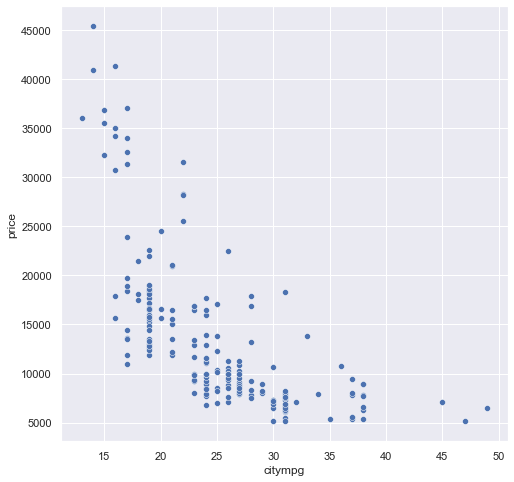

In [56]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

* negative correlation is seen between citympg and price

# Pairplot of all numerical features

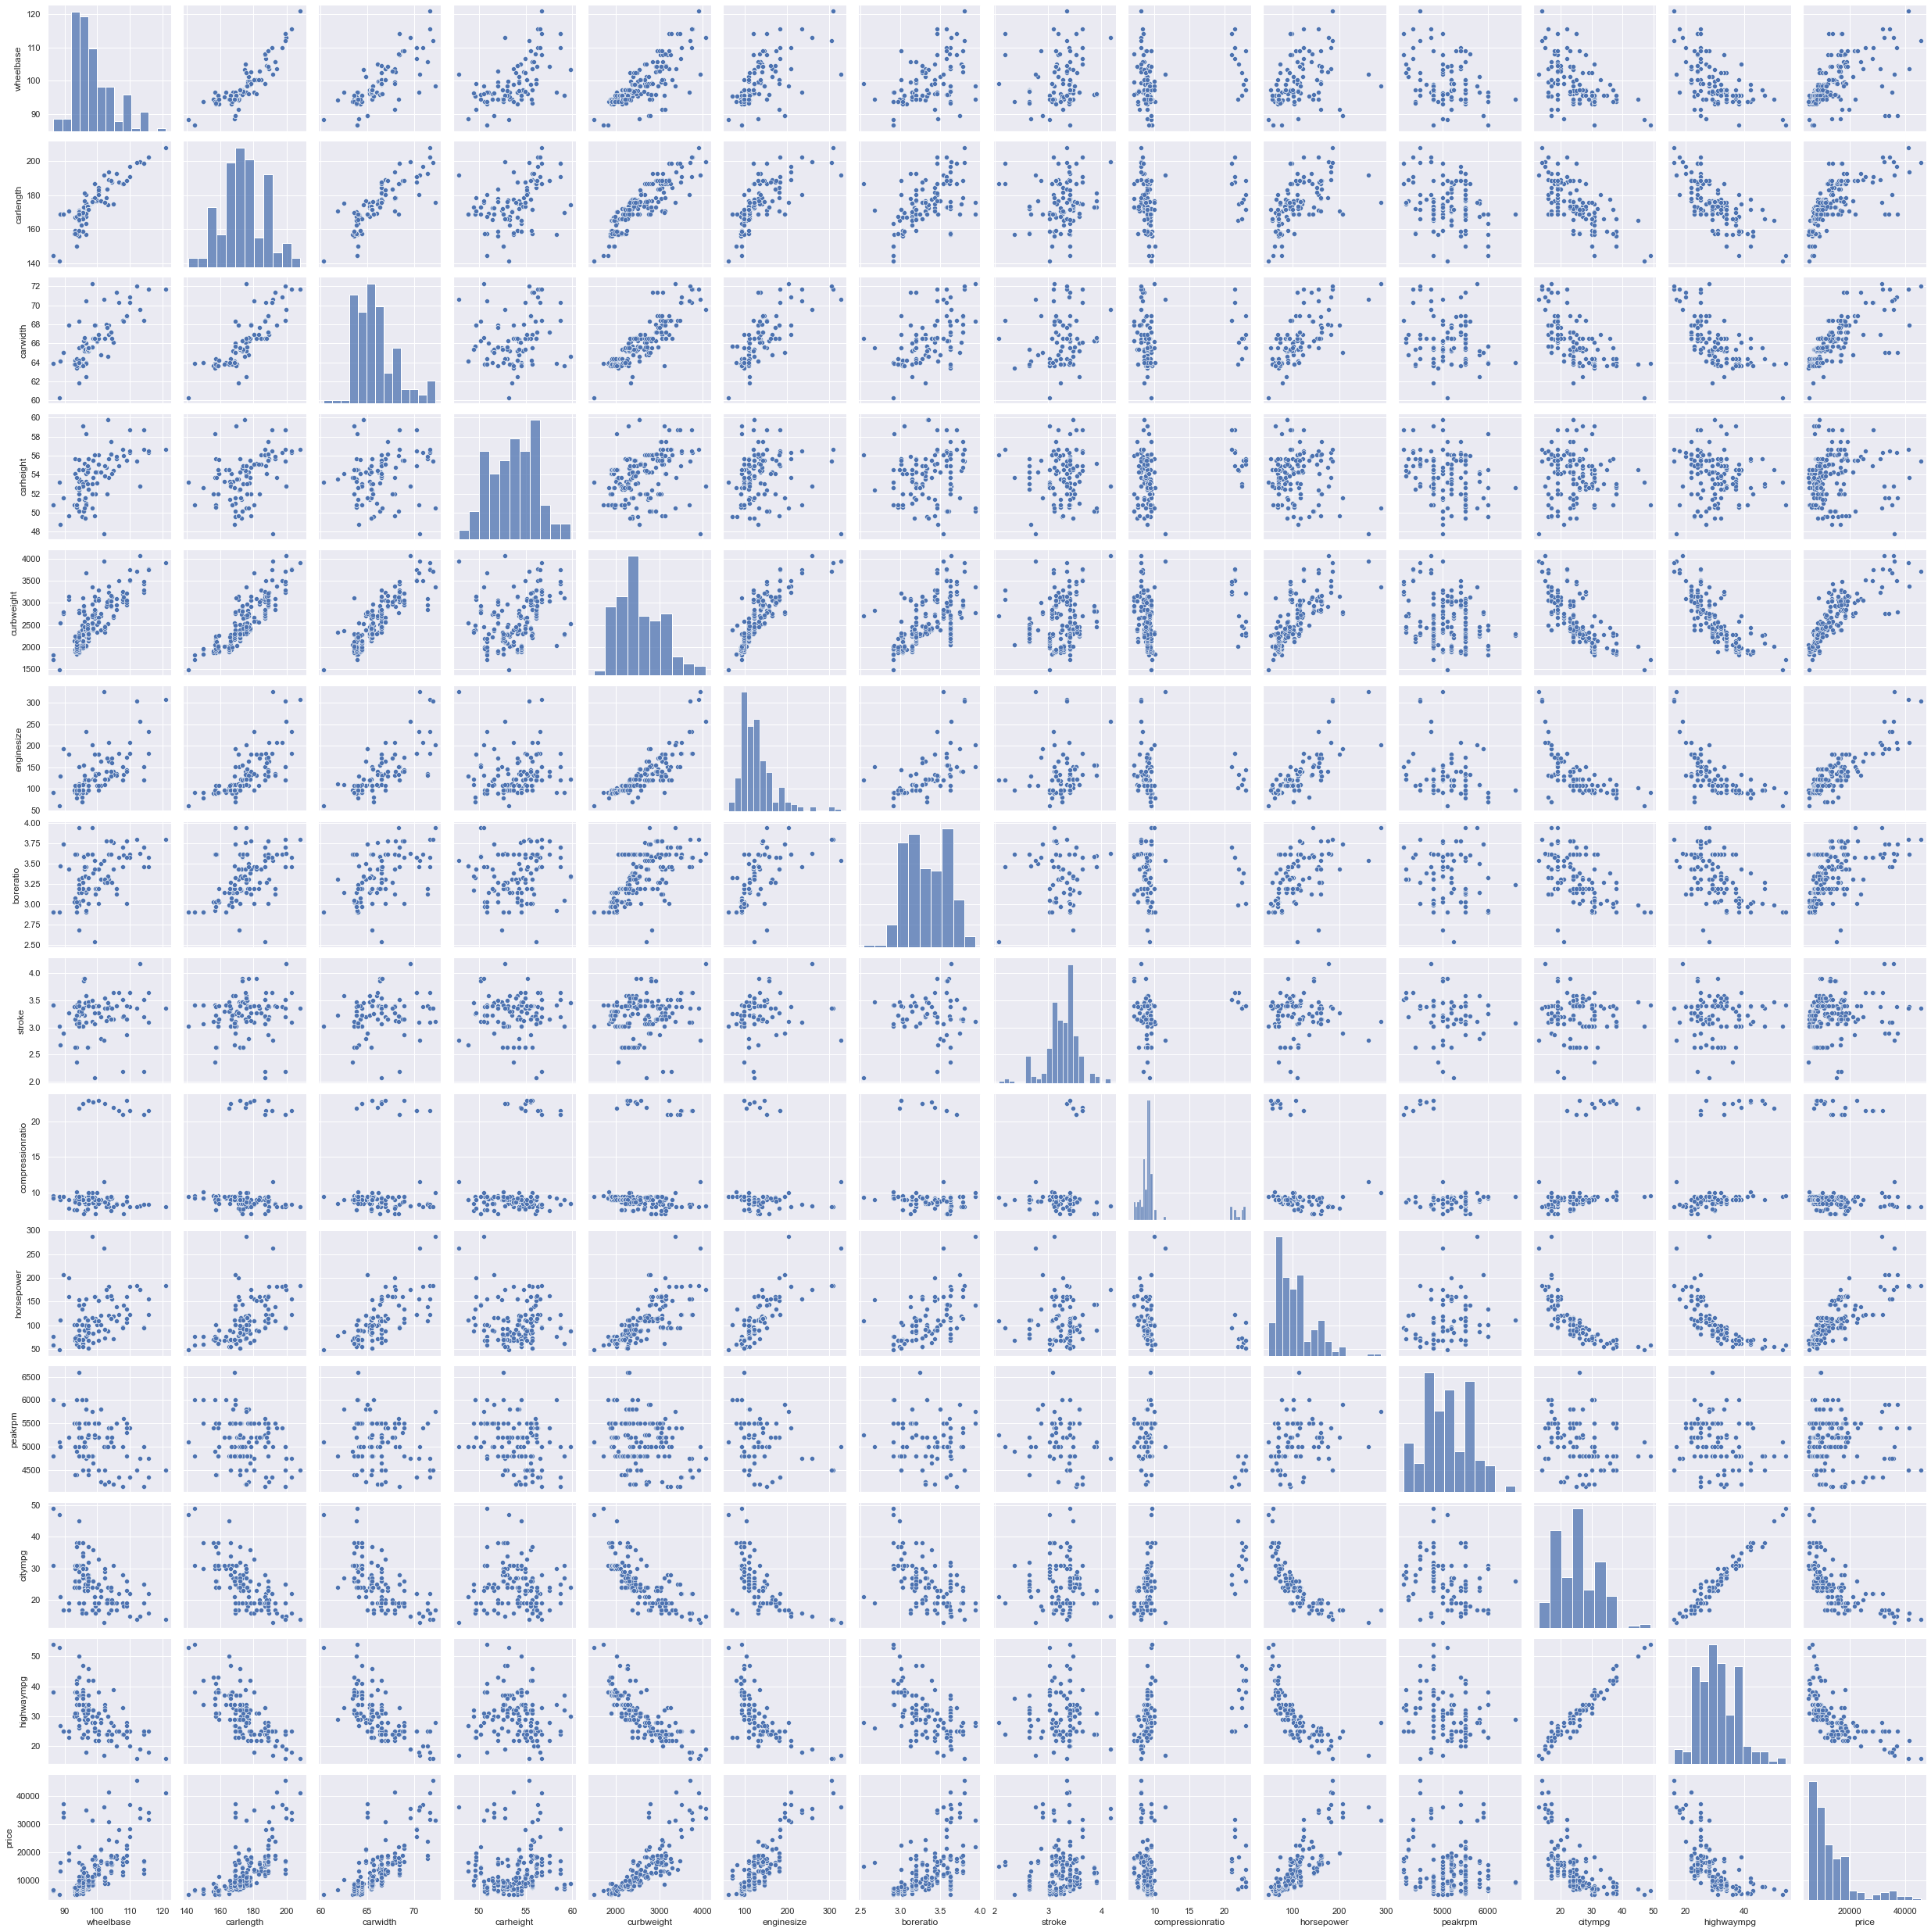

In [57]:
ax = sns.pairplot(data[numerical_cols])

# Correlation matrix

In [58]:
data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

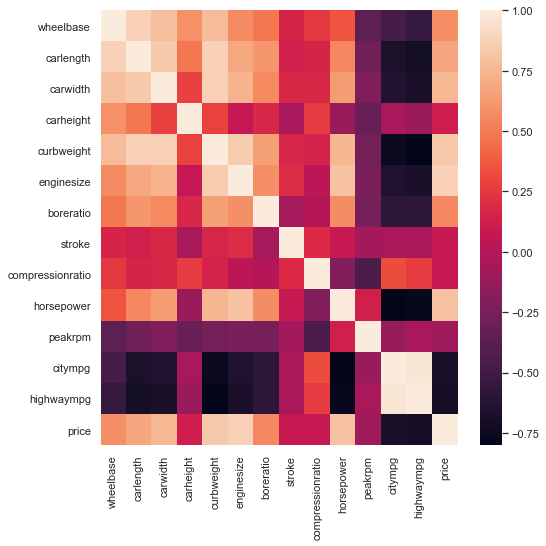

In [59]:
sns.heatmap(data[numerical_cols].corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight	
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg 
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated 


# Scatter plot of wheelbase , carlength,carheight and carweight  with price

In [60]:
col=['wheelbase','carlength','carwidth','curbweight','price']

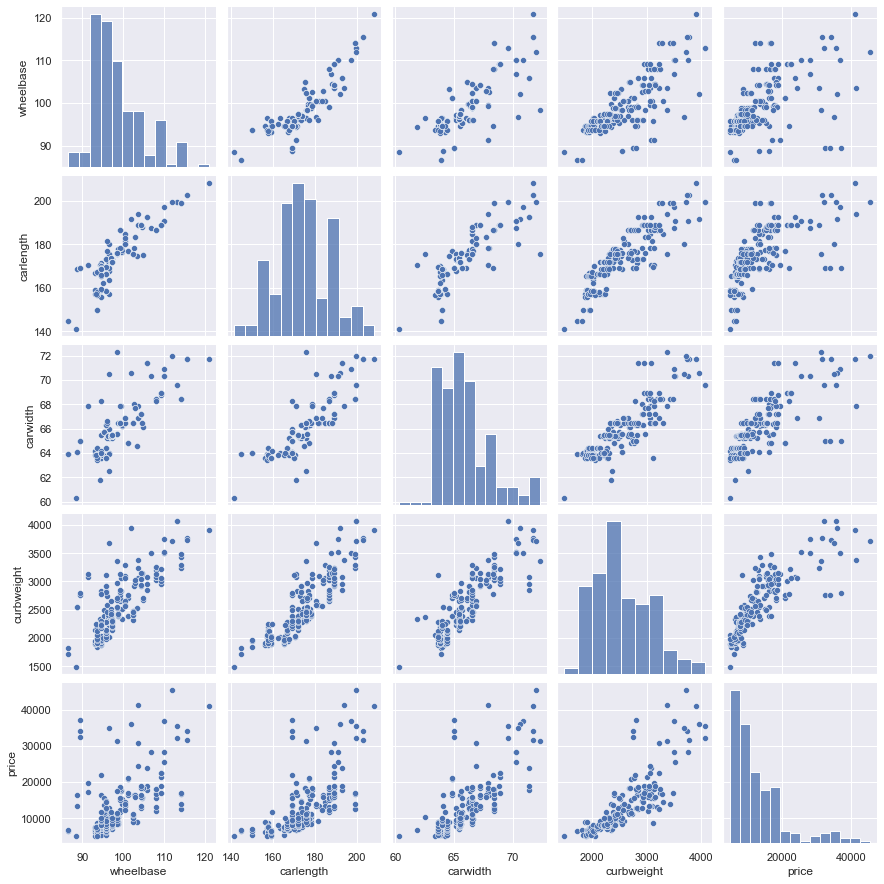

In [61]:
sns.pairplot(data[col])

<AxesSubplot:>

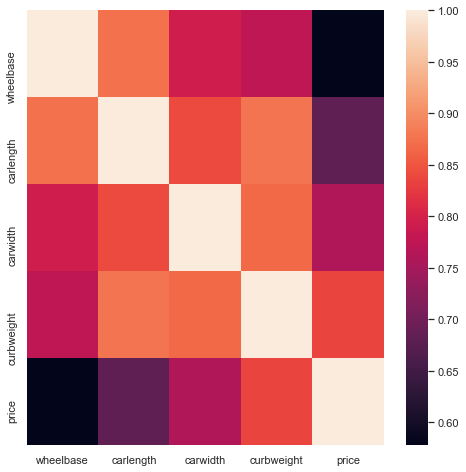

In [62]:
#ploting the heatmap considering the features wheelbase,carlength,carwidth,curbweight,price
sns.heatmap(data[col].corr())

# Scatter plot of carlength,curbweight,highwaympg with price

In [63]:
col=['carlength','highwaympg','curbweight','price']

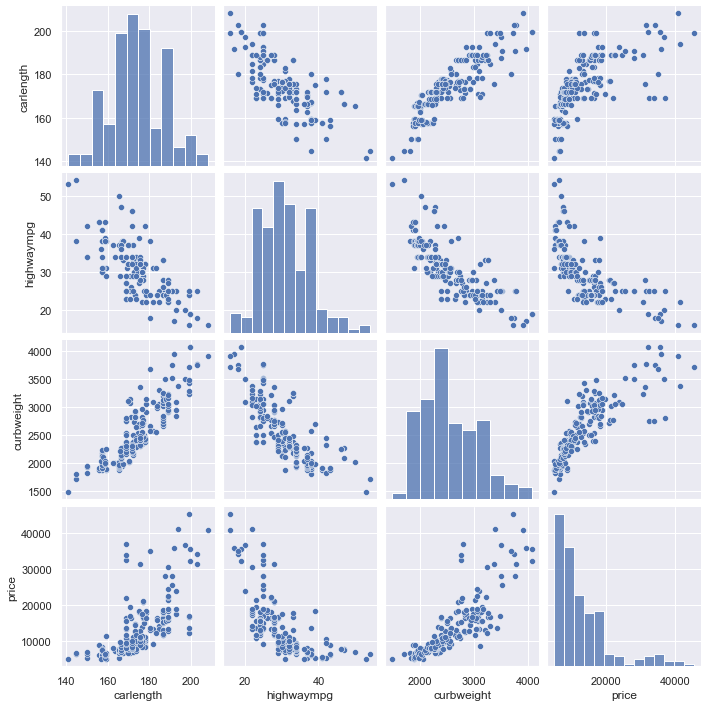

In [64]:
sns.pairplot(data[col])

<AxesSubplot:>

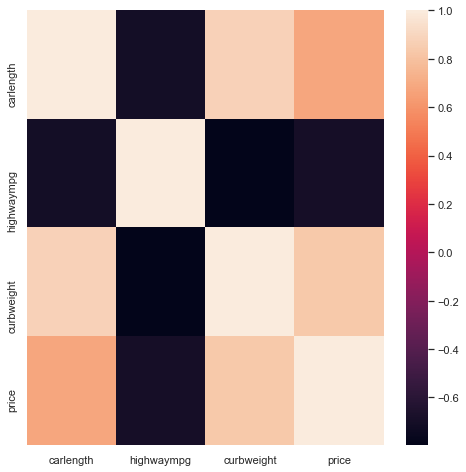

In [65]:
#ploting the heatmap considering the features 'carlength','highwaympg','curbweight','price'
sns.heatmap(data[col].corr())

# Scatter plot of carwidth,curbweight ,engine size and price

In [66]:
col=['carwidth','curbweight','enginesize','price']

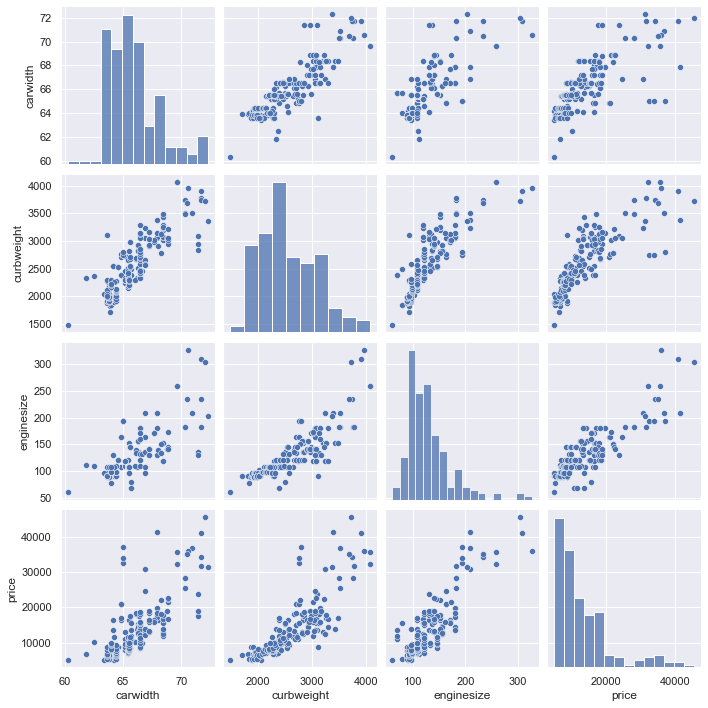

In [67]:
sns.pairplot(data[col])

<AxesSubplot:>

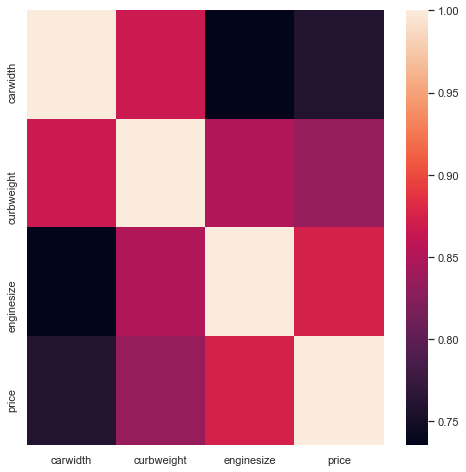

In [68]:
#ploting the heatmap considering the features 'carwidth','curbweight','enginesize','price'
sns.heatmap(data[col].corr())

# Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [69]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

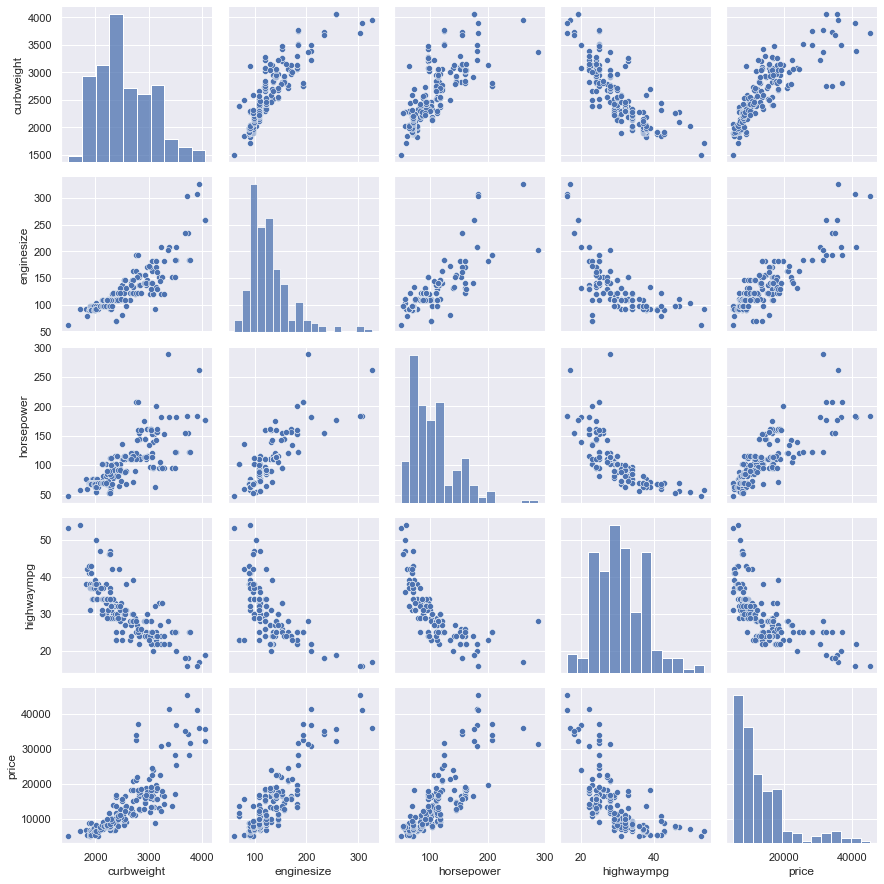

In [70]:
sns.pairplot(data[col])

<AxesSubplot:>

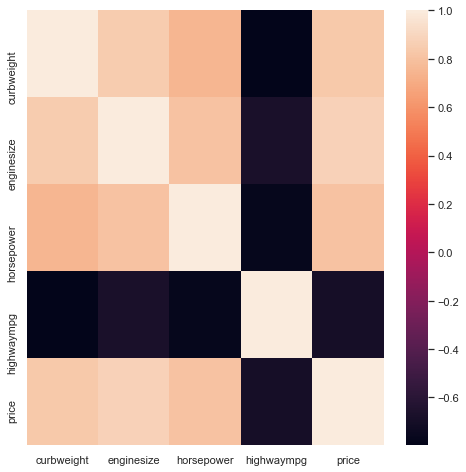

In [71]:
#ploting the heatmap considering the features 'curbweight','enginesize','horsepower','highwaympg','price'
sns.heatmap(data[col].corr())

<font size="+3" color='#540b11'><b>3. Feature Selection </b></font>

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [72]:
X=data[numerical_cols].drop('price',axis=1)
y=data['price']

# Recursive feature elimination (RFE) with random forest

In [73]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

In [74]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [75]:
features=list(X.columns[rfe.support_])
features

['carbody',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

<font size="+3" color='#540b11'><b>4. Data Modelling and Evaluation </b></font>

In [76]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [77]:
# implementing linear regression
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7375029659751728

# Decision Tree Regressor

In [78]:
#implementing Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8839965378654326

# Random Forest regressor

In [79]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9065838247336128

# Conclusion

* We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
* As we can see random forest performing best (with accuracy ~ 0.90)



In [80]:
# multiple linear regression

import pandas as pd
import numpy as np
car_details=pd.read_csv('CarPrice_Assignment.csv')
categorical_variables = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                       'enginetype', 'cylindernumber', 'fuelsystem']

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df= pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
  
for variable in categorical_variables:
    car_details = dummies(variable, car_details)

In [81]:
car_details.shape

(205, 50)

In [82]:
car_details.head()

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
#Removing car_ID and companyname as it is not required for model building
car_details.drop(columns =['car_ID','CarName'], inplace = True)

In [84]:
# Importing train_test_split to train the data for model building
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_details, train_size = 0.7, test_size = 0.3, random_state = 100)

In [85]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.090909,0.349650,0.300699,0.118881,0.125874,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.288490,0.478536,0.460174,0.324786,0.332873,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,115.600000,202.600000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [86]:
y_train = df_train.pop('price')
X_train = df_train

In [87]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# implementing linearregression
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\hp 1034du\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', False, 13),
 ('carheight', False, 31),
 ('curbweight', False, 36),
 ('enginesize', False, 25),
 ('boreratio', True, 1),
 ('stroke', False, 21),
 ('compressionratio', False, 20),
 ('horsepower', False, 28),
 ('peakrpm', False, 34),
 ('citympg', False, 33),
 ('highwaympg', False, 32),
 (-1, False, 3),
 (0, False, 4),
 (1, False, 5),
 (2, False, 6),
 (3, False, 7),
 ('gas', False, 11),
 ('turbo', False, 10),
 ('two', False, 19),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 17),
 ('rwd', True, 1),
 ('rear', True, 1),
 ('dohcv', False, 9),
 ('l', False, 35),
 ('ohc', False, 8),
 ('ohcf', False, 15),
 ('ohcv', False, 22),
 ('rotor', False, 16),
 ('five', False, 29),
 ('four', True, 1),
 ('six', False, 12),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 14),
 ('2bbl', False, 24),
 ('4bbl', True, 1),
 ('idi', False, 18),
 ('mfi', False, 37),
 ('mpfi', Fa

In [90]:
X_train.columns[rfe.support_]

Index(['boreratio', 'hardtop', 'hatchback', 'wagon', 'rwd', 'rear', 'four',
       'three', 'twelve', '4bbl'],
      dtype='object')

In [91]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,boreratio,hardtop,hatchback,wagon,rwd,rear,four,three,twelve,4bbl
122,2.97,0,0,0,0,0,1,0,0,0
125,3.94,0,1,0,1,0,1,0,0,0
166,3.24,0,1,0,1,0,1,0,0,0
1,3.47,0,0,0,1,0,1,0,0,0
199,3.62,0,0,1,1,0,1,0,0,0


In [92]:
# building the model
def buildModel(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [93]:
# model 1
X_train_new = buildModel(X_train_rfe,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     50.40
Date:                Thu, 12 May 2022   Prob (F-statistic):           3.11e-40
Time:                        11:41:58   Log-Likelihood:                -1371.7
No. Observations:                 143   AIC:                             2765.
Df Residuals:                     132   BIC:                             2798.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8141.4079   4645.954     -1.752      0.0

hardtop has high p-value and dropping it.

In [94]:
X_train_new = X_train_new.drop(['hardtop'], axis = 1)

In [95]:
# model 2 

X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     55.75
Date:                Thu, 12 May 2022   Prob (F-statistic):           7.52e-41
Time:                        11:41:59   Log-Likelihood:                -1372.3
No. Observations:                 143   AIC:                             2765.
Df Residuals:                     133   BIC:                             2794.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8150.8104   4650.601     -1.753      0.0

In [96]:
#All the features has p-value less than 0.05. Let's check VIF.
vif_df = X_train_new.drop(['const'], axis = 1)
checkVIF(vif_df)

,Features,VIF
0,boreratio,9.42
5,four,5.85
3,rwd,2.48
1,hatchback,1.77
2,wagon,1.28
8,4bbl,1.17
6,three,1.06
4,rear,1.04
7,twelve,1.04


In [97]:
#Residual Analysis of Model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

C:\Users\hp 1034du\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

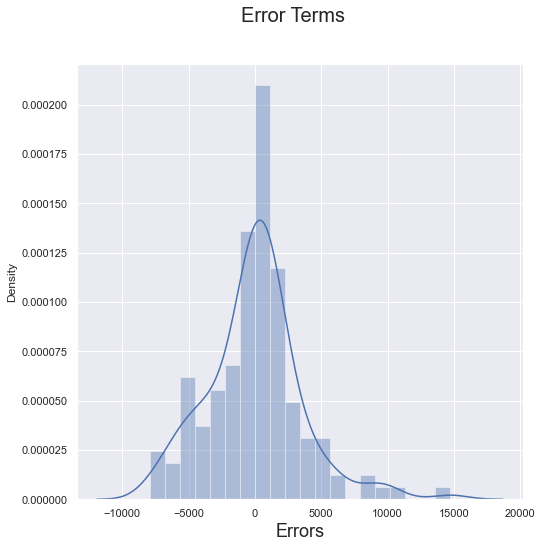

In [98]:
# Plot the histogram of the error terms

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [99]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [100]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
#Making predictions
y_pred = lm.predict(X_test_new)

In [102]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7372918684696876

In [103]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     55.75
Date:                Thu, 12 May 2022   Prob (F-statistic):           7.52e-41
Time:                        11:42:00   Log-Likelihood:                -1372.3
No. Observations:                 143   AIC:                             2765.
Df Residuals:                     133   BIC:                             2794.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8150.8104   4650.601     -1.753      0.0

Text(0, 0.5, 'y_pred')

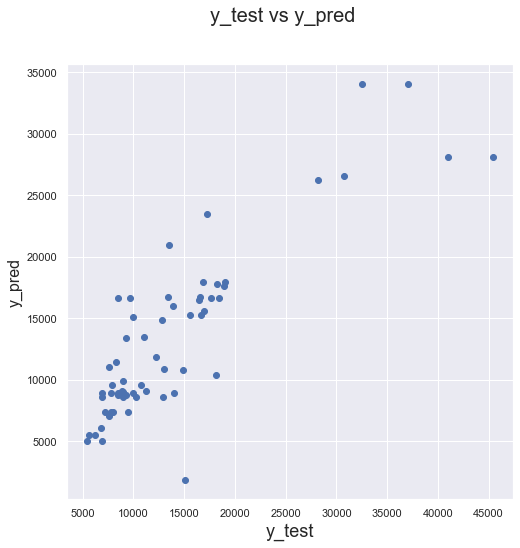

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

Prediction and Evaluation for different models

In [105]:
#data prepocessing
for j in range(0,len(data),1):
    data.loc[j,'CarName']=data.loc[j,'CarName'].split()[0]

In [106]:
#replacing vw with volkswagen
data['CarName'] = data['CarName'].replace(['vw'], 'volkswagen')

In [107]:
categorical=[i for i in data.columns if data[i].dtypes=='object']

In [108]:
#removing dummies from categorical data
X1=pd.get_dummies(data[categorical], drop_first=True)

In [109]:
features=[i for i in data.iloc[:,:-1].columns if data[i].dtypes!='object']
X2=data[features]

In [110]:
X=pd.concat([X2,X1], axis=1)
X=X.values
X

array([[ 88.6, 168.8,  64.1, ...,   1. ,   0. ,   0. ],
       [ 88.6, 168.8,  64.1, ...,   1. ,   0. ,   0. ],
       [ 94.5, 171.2,  65.5, ...,   1. ,   0. ,   0. ],
       ...,
       [109.1, 188.8,  68.9, ...,   1. ,   0. ,   0. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   0. ],
       [109.1, 188.8,  68.9, ...,   1. ,   0. ,   0. ]])

In [111]:
Y=data.iloc[:,-1:]
Y=np.log(Y)
Y=Y.values

In [112]:
#Train and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=1)

In [113]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:, :(len(X1.columns))]= sc.fit_transform(X_train[:, :(len(X1.columns))])
X_test[:, :(len(X1.columns))]= sc.transform(X_test[:, :(len(X1.columns))])

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import make_scorer

#Regression Model
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [115]:
#Before analysing different regression models, 
#let's define comparison criteria for different models as well as for GridSeach cross-valuation technique.
def custom_function(Y_train, Y_pred):
    MAE=round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 4)
    return MAE

scorer=make_scorer(custom_function,greater_is_better=False)

In [116]:
#Linear Regression

reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  0.8923
RMSE:  2467.2
MSE:  1518.43


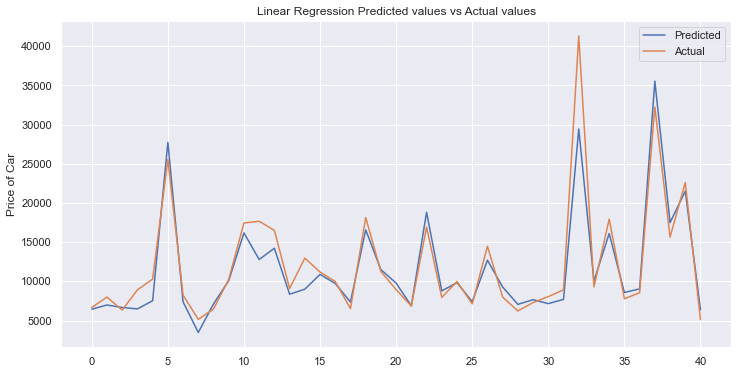

In [117]:
#ploting graph of Linear Regression based on actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(np.exp(Y_pred), label='Predicted')
plt.legend()
plt.plot(np.exp(Y_test), label='Actual')
plt.legend()
plt.title('Linear Regression Predicted values vs Actual values')
plt.ylabel('Price of Car')
plt.show()

In [118]:
#Random Forest Regression

reg = RandomForestRegressor(n_estimators=3000, max_depth=10)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

<ipython-input-118-bc73f581c8c6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, Y_train)


R2_Score:  0.9148
RMSE:  2273.74
MSE:  1514.18


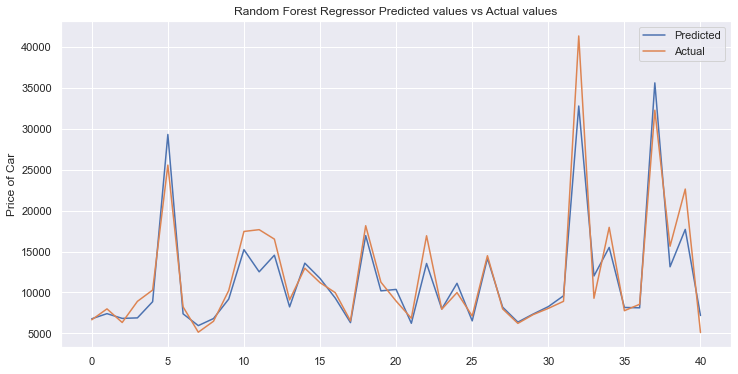

In [119]:
#ploting graph of Random Forest Regression based on actual and predicted values 
plt.figure(figsize=(12,6))
plt.plot(np.exp(Y_pred), label='Predicted')
plt.legend()
plt.plot(np.exp(Y_test), label='Actual')
plt.legend()
plt.title('Random Forest Regressor Predicted values vs Actual values')
plt.ylabel('Price of Car')
plt.show()

In [120]:
#Decision Tree Regression

reg = DecisionTreeRegressor(random_state=11)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  0.8722
RMSE:  2668.74
MSE:  1654.1


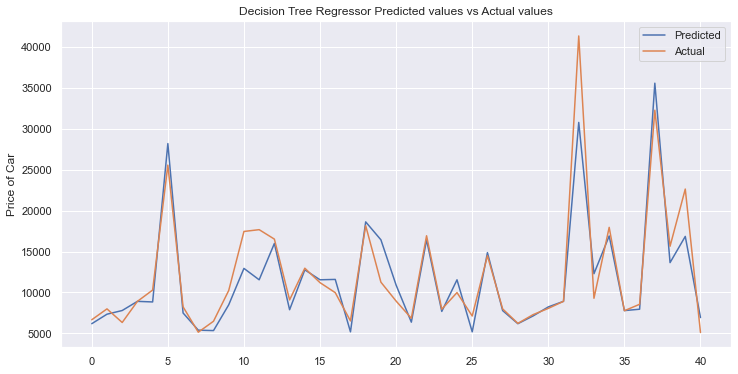

In [121]:
#ploting graph of Decision Tree Regression based on actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(np.exp(Y_pred), label='Predicted')
plt.legend()
plt.plot(np.exp(Y_test), label='Actual')
plt.legend()
plt.title('Decision Tree Regressor Predicted values vs Actual values')
plt.ylabel('Price of Car')
plt.show()

Text(0, 0.5, 'y_pred')

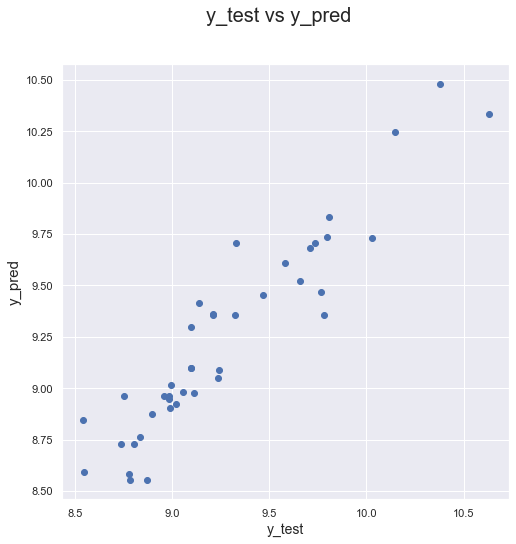

In [122]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.

Y_pred = reg.predict(X_test)
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=15)   

predicting the car price using some features

In [123]:
#dropping of categorical features 
features_drop = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
new_data = data.drop(features_drop, axis=1)

In [124]:
new_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [125]:
new_data.shape

(205, 14)

In [126]:
X = new_data.drop('price', axis = 1)
y = new_data['price']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=42)

In [128]:
#Regression Model
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [129]:
reg = RandomForestRegressor(n_estimators=3000, max_depth=10)
reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)

In [141]:
features_drop = ['symboling','CarName','fueltype','aspiration','doornumber','peakrpm','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
new_dataa = data.drop(features_drop, axis=1)

In [142]:
def random_predict_price(horsepower,enginesize,wheelbase,highwaympg):    
    loc_index = np.where(new_dataa.columns==horsepower)[0]

    x = np.zeros(len(new_dataa.columns))
    x[0] = enginesize
    x[1] = wheelbase
    x[2] = highwaympg
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [143]:
y_pred=  y_pred.astype(int)

In [144]:
pre= reg.predict(X_test)

In [145]:
random_predict_price(154 , 152, 94.5, 26)

<ipython-input-142-6ede16fe32c7>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:


11091.086789682538

### Conclusion

We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor 
As we can see random forest performing best (with accuracy ~ 0.91)
so random forest Regressor is used for car price prediction